In [8]:
import sys
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

Get adjusted close price for all the stocks in S&P 500 index.

In [4]:
def get_tickers():
    table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    tickers_df = table[0]
    tickers_list = tickers_df['Symbol'].tolist()
    return tickers_list


tickers = get_tickers()
data = yf.download(tickers, start='2017-12-01', end='2022-12-31')['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


Resample adjusted close price to month periods and calculate log returns for each month. We will assume that the trade happens at the end of each month.
Compounded return is calculated since the begginning of each month. The return values in the dataframe are expressed in logarithimc rate of return.

In [67]:
def get_log_returns(data: pd.DataFrame):
    
    data.index = pd.to_datetime(data.index)
    data = data.resample('1M').last().apply(lambda x: np.log(x).diff())
    data = data.iloc[1:]  #TODO: for first row make month count from first day, not previous month's price
    return data

data_returns = get_log_returns(data)
data_returns

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,0.092088,0.043072,0.160023,-0.010694,0.155892,0.082035,0.090204,0.001871,0.048513,0.130960,...,-0.017955,-0.052706,0.042829,-0.079321,0.057826,0.035864,0.052072,0.171018,0.061053,0.064714
2018-02-28,-0.068186,0.000632,-0.023699,0.065961,0.031662,-0.042404,-0.029882,-0.030140,0.001927,0.045839,...,0.014509,-0.053094,-0.131870,-0.081332,0.034491,-0.034065,-0.089389,0.114783,0.021105,0.052426
2018-03-31,-0.024947,-0.043129,0.037466,-0.059804,-0.201938,-0.098773,-0.006819,-0.030492,-0.047766,0.032693,...,0.085000,0.058354,-0.015032,-0.106458,0.030894,0.045050,-0.061814,0.007572,-0.041603,0.032247
2018-04-30,-0.015262,-0.190903,-0.035197,-0.015134,0.030180,0.049447,-0.025526,-0.065918,-0.006311,0.025225,...,0.020785,0.029465,0.041224,0.000596,-0.053677,0.022878,0.054695,-0.031825,0.037593,0.001107
2018-05-31,-0.059864,0.016445,0.116724,0.126742,0.024453,-0.093434,0.056843,-0.021189,0.029584,0.117703,...,0.055334,-0.028586,0.053994,-0.138938,-0.031978,-0.064226,-0.032295,0.129751,0.005254,0.002632
2018-06-30,-0.001293,-0.137147,0.054015,-0.009463,-0.065685,0.037397,-0.008815,0.011785,0.049175,-0.022188,...,-0.158138,0.012490,0.018175,0.001090,-0.043845,-0.038990,0.001555,-0.069174,-0.039447,0.017645
2018-07-31,0.068123,0.040780,0.039943,0.027599,0.005618,-0.041179,0.076436,0.144058,-0.026386,0.003562,...,-0.003352,0.025504,-0.014857,0.094541,0.127727,0.013587,0.118979,-0.037845,-0.018968,0.016496
2018-08-31,0.022459,0.026101,0.149660,0.182673,0.039854,0.099219,0.019641,0.000327,0.059335,0.074140,...,-0.111942,0.025078,-0.006315,-0.186613,-0.005774,0.095815,-0.015172,0.219235,0.035907,0.046541
2018-09-30,0.043460,0.020781,0.026231,-0.008338,-0.014694,0.024701,0.093077,-0.025175,0.006661,0.024145,...,-0.154848,-0.009785,0.058737,-0.053840,0.050852,0.045227,0.063333,0.029207,-0.060730,0.010540


Visualize monthly log returns of the exemplary stock.

Date
2018-01-31    0.215627
2018-02-28    0.041554
2018-03-31   -0.044003
2018-04-30    0.078880
2018-05-31    0.039739
2018-06-30    0.042164
2018-07-31    0.044664
2018-08-31    0.124308
2018-09-30   -0.004836
2018-10-31   -0.225887
2018-11-30    0.056070
2018-12-31   -0.118051
2019-01-31    0.134808
2019-02-28   -0.046993
2019-03-31    0.082442
2019-04-30    0.078681
2019-05-31   -0.081875
2019-06-30    0.064656
2019-07-31   -0.014281
2019-08-31   -0.049688
2019-09-30   -0.022995
2019-10-31    0.023203
2019-11-30    0.013496
2019-12-31    0.025786
2020-01-31    0.083480
2020-02-29   -0.064233
2020-03-31    0.034421
2020-04-30    0.238150
2020-05-31   -0.012867
2020-06-30    0.121834
2020-07-31    0.137249
2020-08-31    0.086601
2020-09-30   -0.091653
2020-10-31   -0.036409
2020-11-30    0.042523
2020-12-31    0.027672
2021-01-31   -0.015699
2021-02-28   -0.035968
2021-03-31    0.000372
2021-04-30    0.113920
2021-05-31   -0.073076
2021-06-30    0.065184
2021-07-31   -0.033270
2021-0

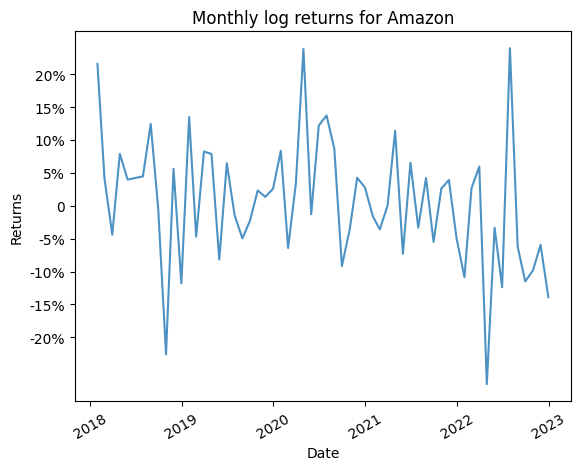

In [12]:
print(data_returns['AMZN'])

plt.plot(data_returns.index, data_returns['AMZN'].fillna(0)*100, alpha = .8)
plt.title('Monthly log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=30) # rotating x-ticks
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()

Shifting returns to move through the time series.

In [14]:
def shift_returns(data: pd.DataFrame, n_shift: int):
    return data.shift(n_shift)

data_previous_returns = shift_returns(data_returns, 1)
data_next_returns = shift_returns(data_returns, -1)

Visualize next and previous returns of the exemplary stock.

Date
2018-01-31    0.041554
2018-02-28   -0.044003
2018-03-31    0.078880
2018-04-30    0.039739
2018-05-31    0.042164
2018-06-30    0.044664
2018-07-31    0.124308
2018-08-31   -0.004836
2018-09-30   -0.225887
2018-10-31    0.056070
2018-11-30   -0.118051
2018-12-31    0.134808
2019-01-31   -0.046993
2019-02-28    0.082442
2019-03-31    0.078681
2019-04-30   -0.081875
2019-05-31    0.064656
2019-06-30   -0.014281
2019-07-31   -0.049688
2019-08-31   -0.022995
2019-09-30    0.023203
2019-10-31    0.013496
2019-11-30    0.025786
2019-12-31    0.083480
2020-01-31   -0.064233
2020-02-29    0.034421
2020-03-31    0.238150
2020-04-30   -0.012867
2020-05-31    0.121834
2020-06-30    0.137249
2020-07-31    0.086601
2020-08-31   -0.091653
2020-09-30   -0.036409
2020-10-31    0.042523
2020-11-30    0.027672
2020-12-31   -0.015699
2021-01-31   -0.035968
2021-02-28    0.000372
2021-03-31    0.113920
2021-04-30   -0.073076
2021-05-31    0.065184
2021-06-30   -0.033270
2021-07-31    0.042134
2021-0

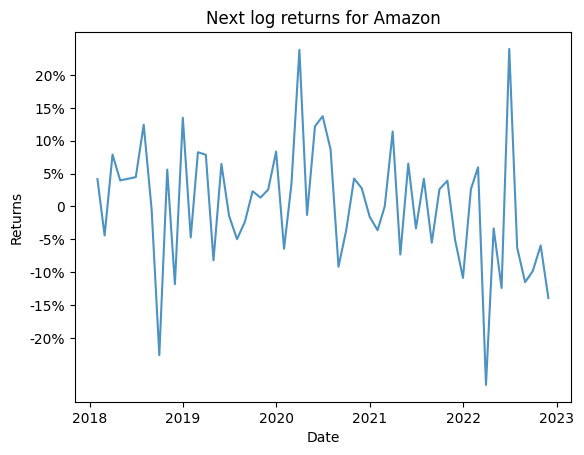

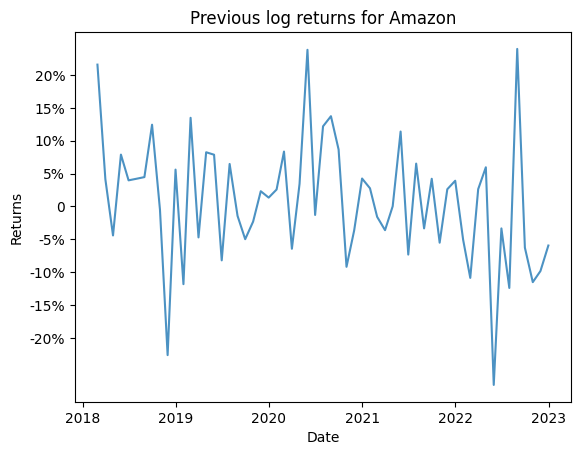

In [16]:
print(data_next_returns['AMZN'])
print(data_previous_returns['AMZN'])

plt.plot(data_next_returns.index, data_next_returns['AMZN']*100, alpha = .8)
plt.title('Next log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()

plt.plot(data_previous_returns.index, data_previous_returns['AMZN']*100, alpha = .8)
plt.title('Previous log returns for Amazon')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.yticks([0, 5, 10, 15, 20, -5, -10, -15, -20], 
           ['0', '5%', '10%', '15%', '20%', '-5%', '-10%', '-15%', '-20%'])
plt.show()

Get 10 best and worst performing stocks for each month to generate trading signals that will rebalance portfolio at the end of each month
by entering long position for the best 10 stocks and short position for 10 the worst.

In [72]:
def get_best_worst_stocks(data: pd.DataFrame, n_stocks: int):

    
    stocks_best_worst = pd.DataFrame(0, index=data.index, columns=data.columns)
    
    for idx, row in data.iterrows():
        # ignore 0's in first row  
        indices = list(row[row != 0].nlargest(n_stocks).index)
        stocks_best_worst.loc[idx][indices] = 1
        
    return stocks_best_worst


n_stocks = 10
long_position = get_best_worst_stocks(data_previous_returns.fillna(0), n_stocks)
short_position = get_best_worst_stocks(-1*data_previous_returns.fillna(0), n_stocks)

most_long_stocks = long_position.sum().sort_values(ascending=False).index[:10].values.tolist()
most_short_stocks = short_position.sum().sort_values(ascending=False).index[:10].values.tolist()

print(most_long_stocks)
print(most_short_stocks)

['ENPH', 'TSLA', 'ETSY', 'MRNA', 'AMD', 'SEDG', 'APA', 'DXCM', 'BBWI', 'CZR']
['CCL', 'CZR', 'EQT', 'ENPH', 'TSLA', 'BBWI', 'MTCH', 'MRNA', 'PCG', 'APA']


Calculate net portofolio returns. We are assuming that every stock gets equal amount of investment - hence the porfolio return for each month is an arithmetic avarage of all individual stock returns. 

In [47]:
def calc_portfolio_returns(long_position: pd.DataFrame, short_position: pd.DataFrame, next_returns: pd.DataFrame, n_stocks: int):
    
    return ((long_position - short_position) * next_returns) / n_stocks


portoflio_returns = calc_portfolio_returns(long_position, short_position, next_returns, n_stocks*2)

Date
2018-01-31    0.000000
2018-02-28    0.004826
2018-03-31   -0.045667
2018-04-30    0.019318
2018-05-31   -0.009174
2018-06-30    0.005350
2018-07-31    0.036146
2018-08-31    0.025462
2018-09-30   -0.039092
2018-10-31   -0.029382
2018-11-30    0.031617
2018-12-31    0.062878
2019-01-31   -0.004207
2019-02-28   -0.005819
2019-03-31    0.038629
2019-04-30    0.008575
2019-05-31   -0.009313
2019-06-30    0.021588
2019-07-31   -0.006567
2019-08-31   -0.028844
2019-09-30    0.048337
2019-10-31   -0.046926
2019-11-30   -0.032047
2019-12-31    0.071139
2020-01-31    0.000757
2020-02-29   -0.054321
2020-03-31   -0.051782
2020-04-30   -0.010966
2020-05-31    0.012441
2020-06-30    0.053187
2020-07-31    0.017085
2020-08-31    0.012957
2020-09-30   -0.008457
2020-10-31   -0.107762
2020-11-30    0.012960
2020-12-31    0.053347
2021-01-31    0.041948
2021-02-28   -0.014729
2021-03-31    0.015179
2021-04-30    0.021655
2021-05-31   -0.017326
2021-06-30   -0.003308
2021-07-31    0.020721
2021-0

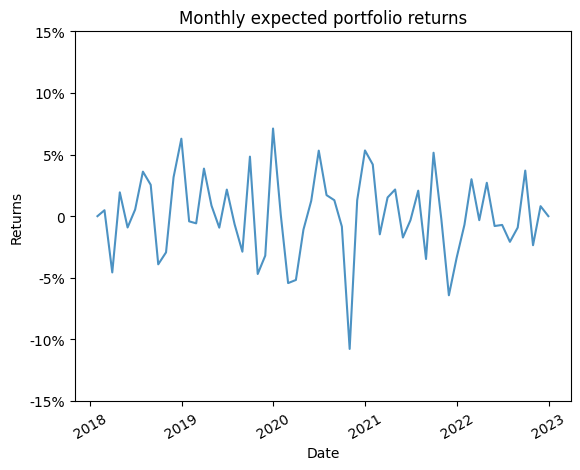

In [48]:
monthly_portolio_returns = portoflio_returns.T.sum()
print(monthly_portolio_returns)
plt.plot(portoflio_returns.index, monthly_portolio_returns*100, alpha = .8)
plt.title('Monthly expected portfolio returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=30) # rotating x-ticks
plt.yticks([0, 5, 10, 15, -5, -10, -15], 
           ['0', '5%', '10%', '15%', '-5%', '-10%', '-15%'])
plt.show()

In [78]:
def analyse_strategy(data: pd.DataFrame):
    total_returns = data.cumsum()[-1] * 100
    mean_return = data.mean()
    standard_err = data.sem()
    vol = data.std() * np.sqrt(12) * 100
    sharpe_annual = (mean_return)/data.std() * np.sqrt(12)
    return_annual_rate = (np.exp(mean_return  * 12) - 1) * 100

    print("""
    Total returns:              {:.2f}%
    Mean:                       {:.6f}
    Standard Error:             {:.6f}
    Annualized volatility:      {:.2f}%
    Annualized Rate of Return:  {:.2f}%
    Annualized Sharpe Ratio:    {:.2f}
    """.format(total_returns, mean_return, standard_err, vol, return_annual_rate, sharpe_annual))
    
analyse_strategy(monthly_portolio_returns)


    Total returns:              5.01%
    Mean:                       0.000835
    Standard Error:             0.004327
    Annualized volatility:      11.61%
    Annualized Rate of Return:  1.01%
    Annualized Sharpe Ratio:    0.09
    


T-Test with null hypothesis that the mean return from the signal is 0. Assume alpha = 0.05 and reject null hypothesis if p-value < alpha.

In [76]:
from scipy import stats

def analyse_alpha(returns):
    
    t_value, p_value = stats.ttest_1samp(returns, 0)
    
    print("""
    Alpha analysis:
     t-statistics:        {:.3f}
     p-value:             {:.6f}
    """.format(t_value, p_value))

analyse_alpha(monthly_portolio_returns)


    Alpha analysis:
     t-statistics:        0.193
     p-value:             0.847578
    


Now we can create a backtesting dataframe for any momentum startegy, where we need to specify stocks that will be a part of our portfolio and number of stocks we want to trade each month. 

In [ ]:
def backtest_strategy(strategy_name: str, tickers: str, start_date: str, end_date: str, n_stocks: int):
    
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    data_returns = get_log_returns(data)
    data_previous_returns = shift_returns(data_returns, 1)
    data_next_returns = shift_returns(data_returns, -1)
    long_position = get_best_worst_stocks(data_previous_returns.fillna(0), n_stocks)
    short_position = get_best_worst_stocks(-1*data_previous_returns.fillna(0), n_stocks)
    portoflio_returns = calc_portfolio_returns(long_position, short_position, next_returns, n_stocks*2)
    monthly_portolio_returns = portoflio_returns.T.sum()
    analyse_strategy(monthly_portolio_returns)
    analyse_alpha(monthly_portolio_returns)

    
tickers = get_tickers()
backtest_strategy('Momentum SP500 20', tickers, '2010-12-01', '2022-12-31', 10)

[**********************65%******                 ]  329 of 503 completed